In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

In [5]:
file_path = '/home/ahmad/Codes/Data_set/packages/anomaly_clean_data_packages.csv'

In [5]:
# df = pd.read_csv(file_path,parse_dates=[0], index_col=0, nrows=2000)
# import matplotlib.pyplot as plt
# from matplotlib.figure import Figure

# k = df.plot(figsize=[15,10], subplots=True,)

# fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, sharex=True,
#                          figsize=[15,10])
# fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, sharex=True,)
# for index, name in enumerate(df.columns):
#     axs[index].plot(df[name], label=name)
#     axs[index].plot(df[name], label=f'predicted {name}')
#     axs[index].legend(loc='upper right')

# fig = Figure(figsize=[20, 30])
# axs = fig.subplots(len(df.columns), sharex=True, gridspec_kw={'hspace': 0})
# for index, name in enumerate(df.columns):
#     axs[index].plot(df[name], label=name)
#     axs[index].plot(df[name], label=f'predicted {name}')
#     axs[index].legend(loc='upper right')

In [6]:
iter_csv = pd.read_csv(file_path, parse_dates=[0], iterator=True, chunksize=1000,index_col=0)

In [7]:
# df = pd.read_csv(file_path,parse_dates=[0],low_memory=False)
constant = ['2019-07-1','2019-07-30']
# k = pd.to_datetime(constant)
df_final = pd.concat([chunk.loc[constant[0]:constant[1]] for chunk in iter_csv])      

In [8]:
# # df = pd.concat([chunk[(chunk['time'] > constant[0]) and (chunk['time'] < constant[1])]
# #                     for chunk in iter_csv])

In [9]:
df_final.head()

,Grade Code,creeping_blade_pressure,dry_end_temperature,jet_speed,load_machine_chest_refiner,machine_chest_consistency,main_steam_pressure,main_steam_temperature,silo_level,stock_pump_flow,wet_end_temperature,wire_speed,yankee_inlet_steam_pressure
time,,,,,,,,,,,,,
2019-07-01 00:00:04,18,0.619947,0.810216,0.805454,0.441622,0.454624,0.910777,0.626291,0.923185,0.439232,0.741921,0.914497,0.750576
2019-07-01 00:00:05,18,0.620253,0.810408,0.805454,0.441622,0.454603,0.910645,0.626291,0.924018,0.438036,0.741896,0.914497,0.750654
2019-07-01 00:00:06,18,0.620253,0.810106,0.805454,0.441622,0.454603,0.910645,0.626291,0.924018,0.438036,0.741921,0.914497,0.750654
2019-07-01 00:00:07,18,0.619947,0.810463,0.805503,0.441799,0.454708,0.910711,0.626196,0.922729,0.436740,0.741799,0.914884,0.750654
2019-07-01 00:00:08,18,0.619947,0.810463,0.805454,0.441622,0.454708,0.910546,0.626177,0.922729,0.436740,0.741848,0.914861,0.750549


In [11]:
# df_final = df[df['time']<'2019-07-30']

In [12]:
df_final = df_final[df_final.columns.difference(['Grade Code','time'])]

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2584821 entries, 2019-07-01 00:00:04 to 2019-07-30 23:59:59
Data columns (total 12 columns):
creeping_blade_pressure        float64
dry_end_temperature            float64
jet_speed                      float64
load_machine_chest_refiner     float64
machine_chest_consistency      float64
main_steam_pressure            float64
main_steam_temperature         float64
silo_level                     float64
stock_pump_flow                float64
wet_end_temperature            float64
wire_speed                     float64
yankee_inlet_steam_pressure    float64
dtypes: float64(12)
memory usage: 256.4 MB


In [14]:
df_final

,creeping_blade_pressure,dry_end_temperature,jet_speed,load_machine_chest_refiner,machine_chest_consistency,main_steam_pressure,main_steam_temperature,silo_level,stock_pump_flow,wet_end_temperature,wire_speed,yankee_inlet_steam_pressure
time,,,,,,,,,,,,
2019-07-01 00:00:04,0.619947,0.810216,0.805454,0.441622,0.454624,0.910777,0.626291,0.923185,0.439232,0.741921,0.914497,0.750576
2019-07-01 00:00:05,0.620253,0.810408,0.805454,0.441622,0.454603,0.910645,0.626291,0.924018,0.438036,0.741896,0.914497,0.750654
2019-07-01 00:00:06,0.620253,0.810106,0.805454,0.441622,0.454603,0.910645,0.626291,0.924018,0.438036,0.741921,0.914497,0.750654
2019-07-01 00:00:07,0.619947,0.810463,0.805503,0.441799,0.454708,0.910711,0.626196,0.922729,0.436740,0.741799,0.914884,0.750654
2019-07-01 00:00:08,0.619947,0.810463,0.805454,0.441622,0.454708,0.910546,0.626177,0.922729,0.436740,0.741848,0.914861,0.750549
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-30 23:59:55,0.617318,0.862505,0.802856,0.444008,0.446547,0.808972,0.611598,0.962862,0.459572,0.750651,0.914838,0.831022
2019-07-30 23:59:56,0.617501,0.862560,0.802529,0.443909,0.446463,0.809103,0.611579,0.960998,0.459587,0.750748,0.914793,0.831022
2019-07-30 23:59:57,0.617501,0.862450,0.801468,0.444414,0.446589,0.808906,0.611503,0.965104,0.459588,0.750967,0.914793,0.830944


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
values = scaler.fit_transform(df_final)
# df_final = values
#Create a test and train sets of our data
train_perc = int(df_final.shape[0]*.8)
# # df_final.iloc[:train_perc]

X_train = values[:train_perc]
X_test = values[train_perc:]

In [16]:
# df = pd.concat([chunk[(chunk['field'] > constant[0]) and (chunk['field'] < constant[0])] for chunk in iter_csv])

In [ ]:
input_dim = X_train.shape[1] # the # features
encoding_dim = 8 # first layer
hidden_dim = int(encoding_dim / 2) #hideen layer

nb_epoch = 30
batch_size = 128
learning_rate = 0.1

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation='tanh')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    
checkpointer = ModelCheckpoint(filepath='/my-model/model/checkpoint',
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_best_only=True)

tensorboard = TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True,
                         write_images=False, update_freq='epoch',
                          embeddings_freq=0, embeddings_metadata=None
                        )

In [22]:
history = autoencoder.fit(X_train, X_train,
                            epochs=nb_epoch,
                            batch_size=batch_size,
                            shuffle=True,
                            validation_data=(X_test, X_test),
                            verbose=1,
                            callbacks=[checkpointer, tensorboard]).history

Train on 2067856 samples, validate on 516965 samples
Epoch 1/30
2067856/2067856 [==============================] - 36s 18us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 2/30
2067856/2067856 [==============================] - 38s 19us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/30
2067856/2067856 [==============================] - 31s 15us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/30
2067856/2067856 [==============================] - 42s 20us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/30
2067856/2067856 [==============================] - 37s 18us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/30
2067856/2067856 [==============================] - 37s 18us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/30
2067856/2067856 [==============================] - 35s 17us/step - loss: 0.0014 - val_loss: 0.0017
Epoch 8/30
2067856/2067856 [==============================] - 45s 22us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/30
2067856/2067856 [==============================] - 33s 1

In [23]:
prediction = autoencoder.predict(X_train)

In [24]:
prediction_df = pd.DataFrame(data=prediction, columns=df_final.columns,index =df_final.index)

In [25]:
# X_train_df = pd.DataFrame(data=X_train, columns=df_final.columns)

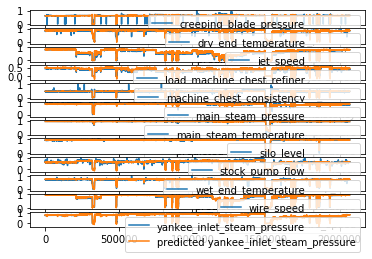

In [30]:
# # for col in df_final.columns:
# #     plt.figure()
# #     ax = X_train_df[col].plot(figsize=[100,40])
# #     prediction_df[col].plot(ax =ax)


fig, axs = plt.subplots(nrows=len(X_train_df.columns), ncols=1, sharex=True,figsize=[30,20])
# axs[0].plot(df['dry_end_temperature'])
for index, name in enumerate(X_train_df.columns):
    axs[index].plot(df_final[name], label=name)
    axs[index].plot(prediction_df[name], label=f'predicted {name}')
    axs[index].legend(loc='upper right')

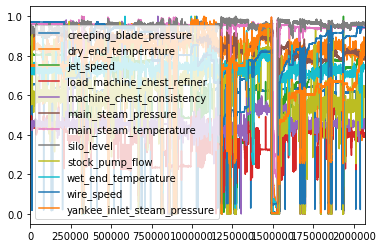

In [29]:
# X_train_df.plot()

In [1]:
from sklearn.externals import joblib


/home/ahmad/anaconda3/envs/test_env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
# joblib.dump(autoencoder,'model/latest.pkl')

In [3]:
autoencoder = joblib.load('model/latest.pkl')

Using TensorFlow backend.
/home/ahmad/anaconda3/envs/test_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ahmad/anaconda3/envs/test_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ahmad/anaconda3/envs/test_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ahmad/anaco

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [ ]:
# autoencoder._make_predict_function
# autoencoder._make_train_function

In [7]:
iter_csv = pd.read_csv(file_path, parse_dates=[0], iterator=True, chunksize=1000,index_col=0)

constant = ['2019-08-1','2019-08-30']
# k = pd.to_datetime(constant)
df_new = pd.concat([chunk.loc[constant[0]:constant[1]] for chunk in iter_csv])      

In [ ]:
df_new = df_new[df_new.columns.difference(['Grade Code','time'])]
prediction_new = autoencoder.predict(df_new)

In [15]:
prediction_df_new = pd.DataFrame(data=prediction_new, columns=df_new.columns,index =df_new.index )

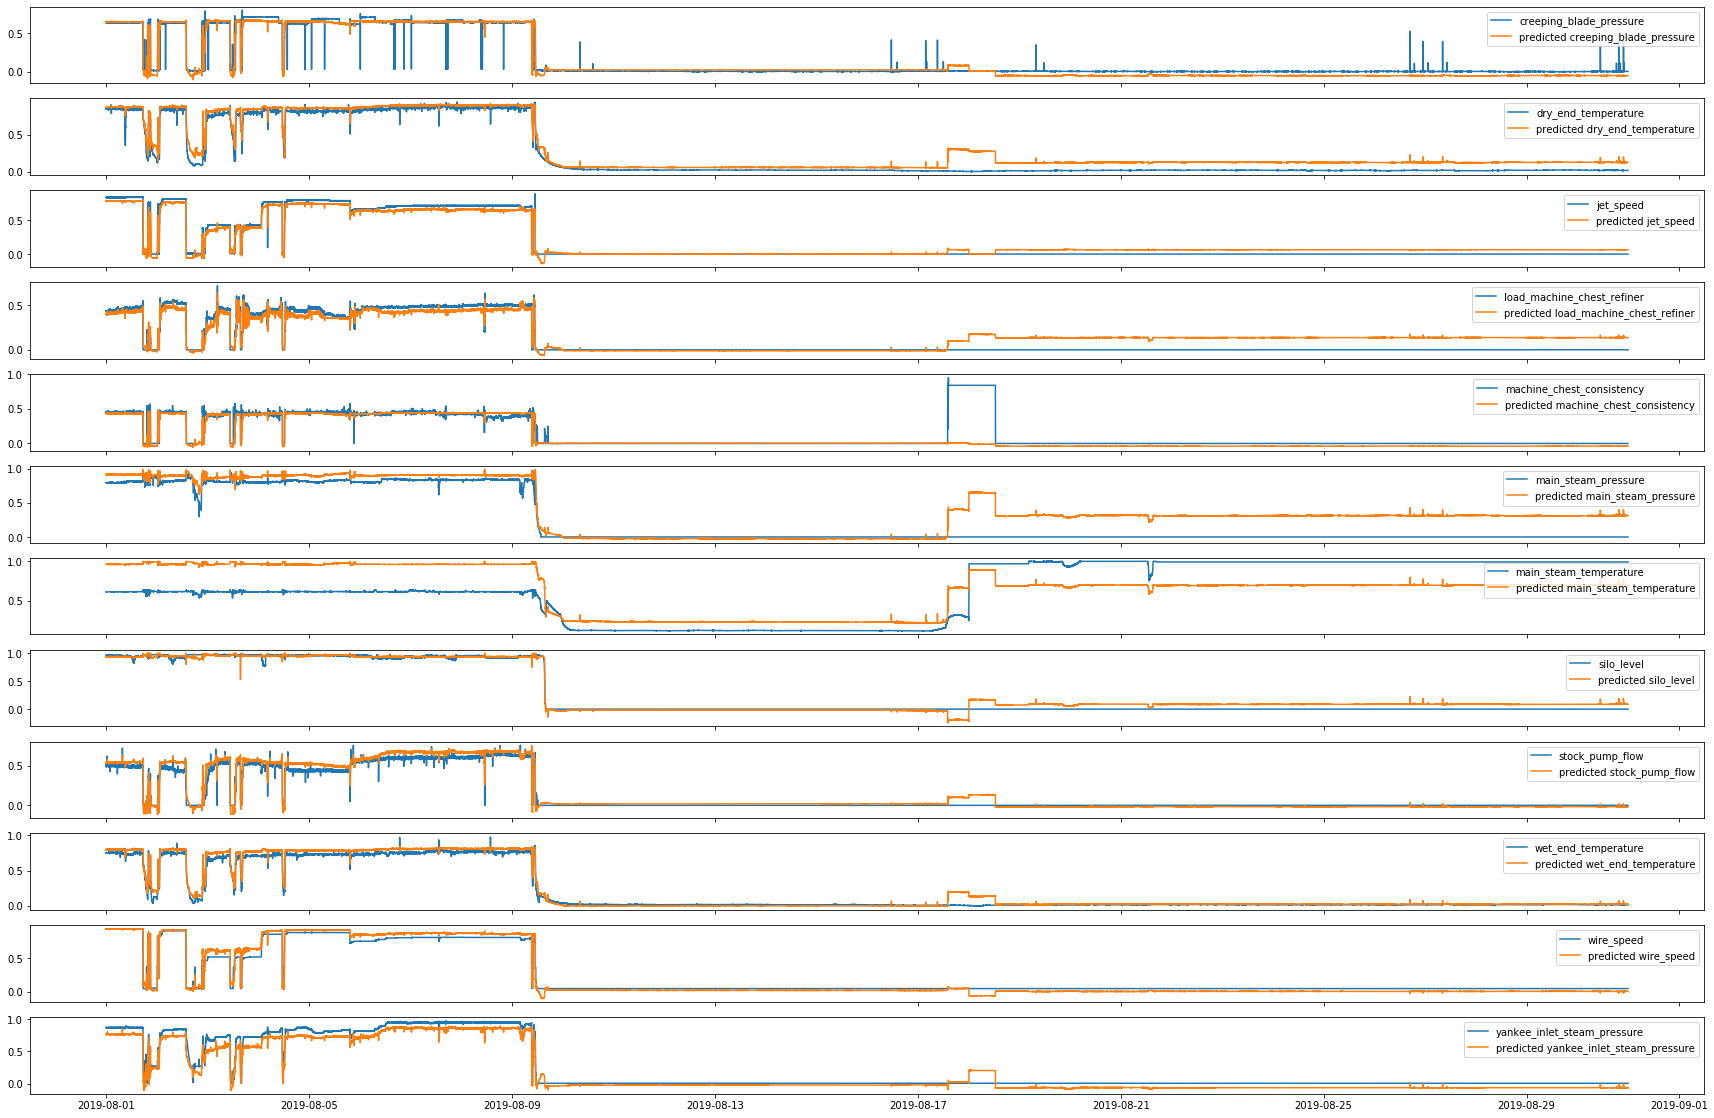

In [16]:
fig, axs = plt.subplots(nrows=len(df_new.columns), ncols=1, sharex=True,figsize=[30,20])

# axs[0].plot(df['dry_end_temperature'])
for index, name in enumerate(df_new.columns):
    axs[index].plot(df_new[name], label=name)
    axs[index].plot(prediction_df_new[name], label=f'predicted {name}')
    axs[index].legend(loc='upper right')

# retrain

In [ ]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=3)

In [20]:
autoencoder.fit(df_new,df_new)

Epoch 1/1
2589705/2589705 [==============================] - 139s 54us/step - loss: 0.0012


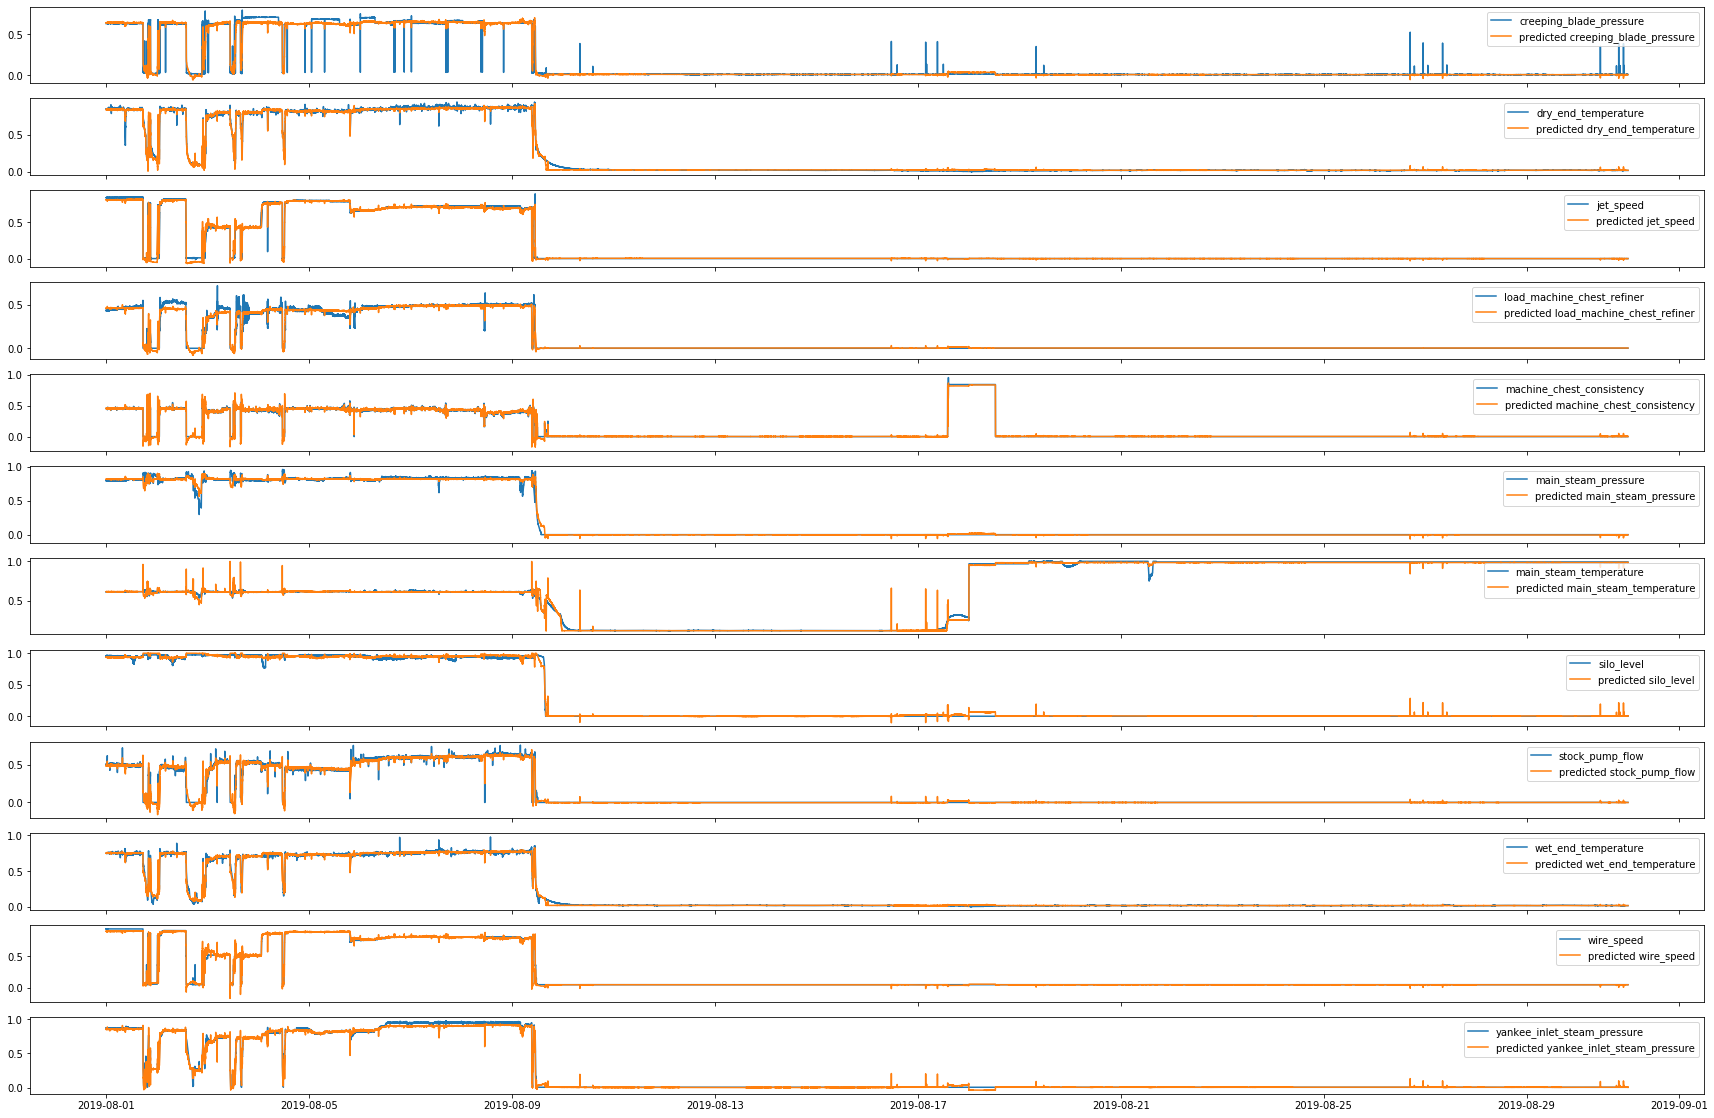

In [22]:
# df_new = df_new[df_new.columns.difference(['Grade Code','time'])]
# prediction_new = 
prediction_df_new  = pd.DataFrame(data=autoencoder.predict(df_new),
                                  columns=df_new.columns,
                                  index=df_new.index )

fig, axs = plt.subplots(nrows=len(df_new.columns), ncols=1, sharex=True,figsize=[30,20])

# axs[0].plot(df['dry_end_temperature'])
for index, name in enumerate(df_new.columns):
    axs[index].plot(df_new[name], label=name)
    axs[index].plot(prediction_df_new[name], label=f'predicted {name}')
    axs[index].legend(loc='upper right')